# Support Vector Regression (SVR) using linear and non-linear kernels

## What is the kernel method?

The kernel method involves bending two-dimensional space. this is perfectly explained here: https://shapeofdata.wordpress.com/2013/05/27/kernels/

Two-dimensional data live in a two-dimensional plane, which we can consider as a piece of paper. The nucleus is a way to place this two-dimensional plane in a space with higher dimensions. In other words, the nucleus is a function from a low-dimensional space to a higher-dimensional space.
So, for example, we can place a plane in three-dimensional space so that it curves along one axis, as in the figure below. Here, the cross-sections of the plane in three-dimensional space are parabolas.

The purpose of the kernel is to make two classes of data points, which can only be separated by a curved line in two-dimensional space, can be separated by a flat plane in three-dimensional space.

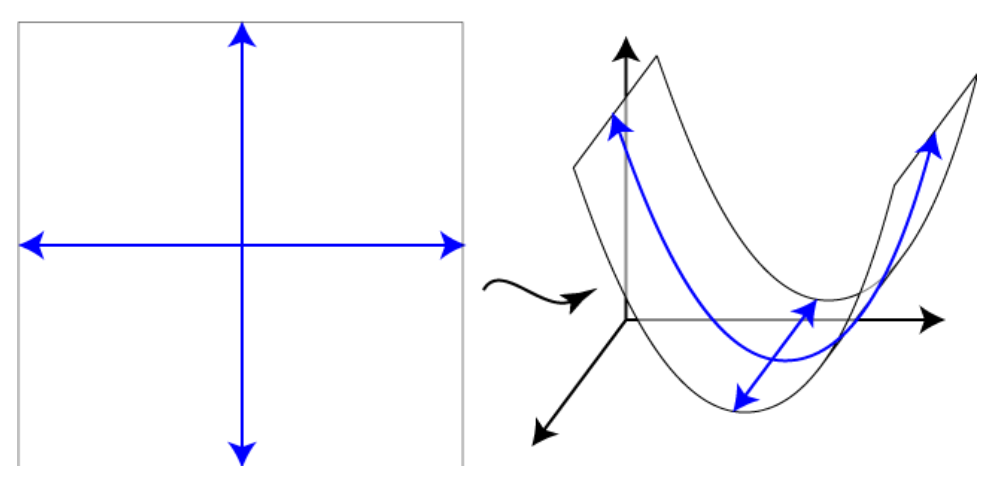

By adding more dimensions, we increase the flexibility of lines / planes / hyperplanes to move. For example, in the data set shown below on the left there is clearly no line separating the two blue points from the two green points. However, when we place this data set in three dimensions using the nucleus of the first figure, the two blue points will be raised, as on the right, so there is now another plane (drawn in red) that separates the blue from the green, shown in the lower right corner . This plane intersects the two-dimensional space on the curve shown in the lower left drawing.

In general, the kernel does it so that each plane in three-dimensional space intersects a two-dimensional plane that contains our data in a curve line, not a straight line. If we use a nucleus that places the plane in an even higher dimensional space, then the hyperplanes in these higher spaces intersect the two-dimensional space on potentially more complex curves, which gives us more flexibility in choosing the curve separating the data.


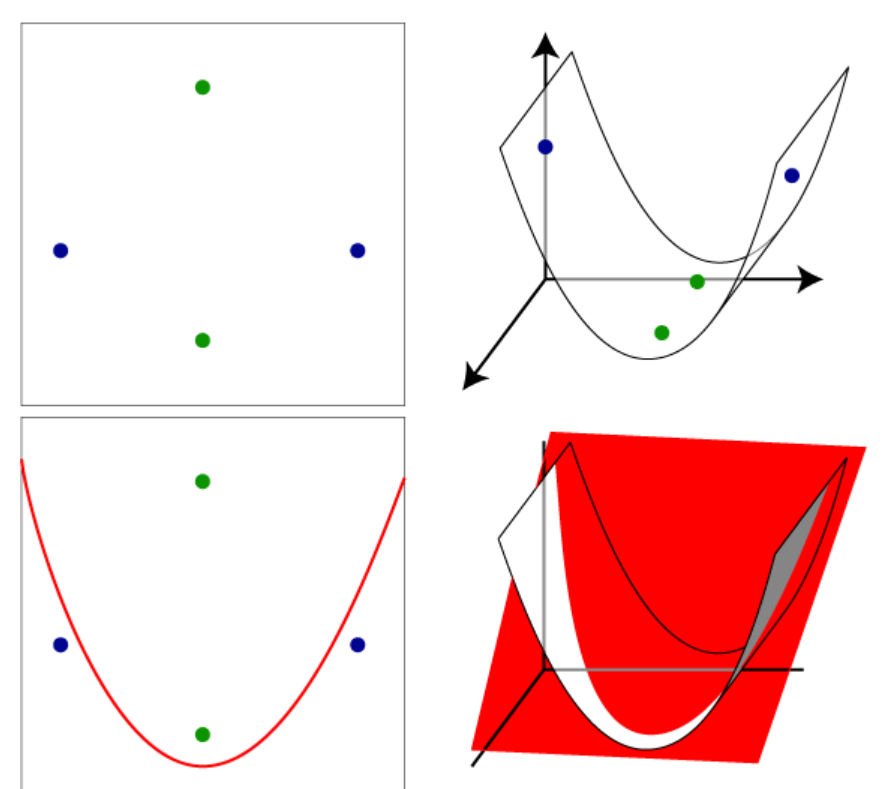

It is worth choosing the simplest possible kernel, is that, as in the case of general regression, the greater the flexibility of the model, the greater the risk of over-fitting.

Epsilon - http://kernelsvm.tripod.com/
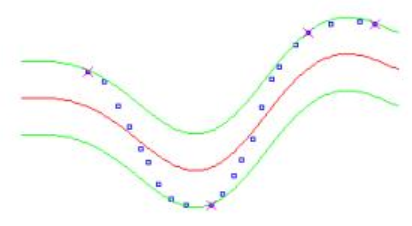
#### Granice epsilon podano zielonymi liniami. Niebieskie punkty reprezentują instancje danych.
Czym większy parametr epsilon tym bardziej krzywam modelu będzie się wypłaszczać 
Wydajność SVM uogólnieniem (dokładność estymacji) zależy od ustawienia dobrych parametrów meta-parametry C , a parametry jądra.

#### Parametr C
- Parametr C określa kompromis między złożonością modelu (płaskością) a stopniem, w jakim odchylenia większe niż są tolerowane w formule optymalizacyjnej, na przykład, jeśli C jest zbyt duży (nieskończoność), wówczas celem jest zminimalizowanie jedynie ryzyka empirycznego, bez uwzględniając część złożoności modelu w sformułowaniu optymalizacyjnym. 

- Parametr kontroluje szerokość strefy -czułości, stosowaną do danych treningowych. Wartość może wpływać na liczbę wektorów pomocniczych użytych do skonstruowania funkcji regresji. Im większe , tym mniej wybranych wektorów pomocniczych. Z drugiej strony, większe wartości skutkują bardziej „płaskimi” szacunkami. 

#### RBF kernel
In machine learning, the radial basis function kernel, or RBF kernel, is a popular kernel function used in various kernelized learning algorithms. In particular, it is commonly used in support vector machine classification.


In [1]:
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt

## Example 1 non-linear kernels SVM  <span style="color:blue">SVR(kernel='rbf')</span>

In [2]:
x = np.sort(6 * np.random.rand(20, 1), axis=0)
y = np.sin(x).ravel()

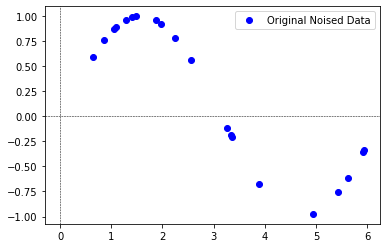

In [3]:
plt.figure()
plt.plot(x, y, 'ko', color ='blue', label="Original Noised Data")
plt.legend()
plt.axhline(y=0, color='black', linestyle='--', lw=0.5)
plt.axvline(x= 0, color = 'black', linestyle='--', lw=0.5)
plt.show() 

Dokonujemy zniekształcenia wykresu sinusoidalnego.

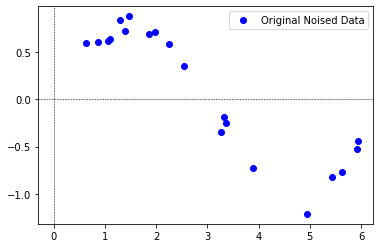

In [4]:
y = (0.3 * (0.05-np.random.rand(20)))+y  #<<<< distorting element


plt.figure()
plt.plot(x, y, 'ko', color ='blue', label="Original Noised Data")
plt.legend()
plt.axhline(y=0, color='black', linestyle='--', lw=0.5)
plt.axvline(x= 0, color = 'black', linestyle='--', lw=0.5)
plt.show() 

In [5]:
print(x.shape)
print(y.shape)


(20, 1)
(20,)


### Model SVM non-linear kernels
 <span style="color:blue">SVR(kernel='rbf')</span>

In [6]:
svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)

# Fit the SVM model according to the given training data.
y_pred = svr_rbf.fit(x, y).predict(x)

In [7]:
import pandas as pd

RBF = pd.DataFrame({'y_actual': y, 'y_predicted': y_pred})
RBF.head(5)

,y_actual,y_predicted
0,0.601198,0.577846
1,0.610104,0.668037
2,0.624167,0.724347
3,0.644582,0.736527
4,0.842055,0.770481


Get parameters for this estimator.

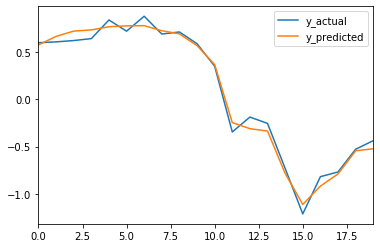

In [8]:
from sklearn import metrics

RBF.head(50).plot()

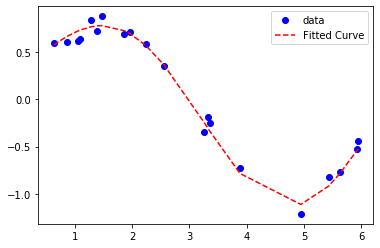

Mean Squared Error:    0.99  


In [9]:
plt.plot(x, y, 'o', color ='blue', label ="data") 
plt.plot(x, y_pred, '--', color ='red', label ="Fitted Curve") 
plt.legend() 
plt.show()

a = svr_rbf.score(x , y , sample_weight = None)
print('Mean Squared Error:    %0.2f  ' % a)

## <span style="color:blue">model summary</span>

In [10]:
a = svr_rbf.score(x , y , sample_weight = None)
print('Return the coefficient of determination R^2 of the prediction.')
print('Mean Squared Error:    %0.2f  ' % a)

Return the coefficient of determination R^2 of the prediction.
Mean Squared Error:    0.99  


In [11]:
print('Get parameters for this estimator.')
svr_rbf.get_params(deep=True)

Get parameters for this estimator.


{'C': 100,
 'cache_size': 200,
 'coef0': 0.0,
 'degree': 3,
 'epsilon': 0.1,
 'gamma': 0.1,
 'kernel': 'rbf',
 'max_iter': -1,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [12]:
y_pred=svr_rbf.predict(x)

## Example 2 non-linear kernels  SVM  <span style="color:blue">SVR(kernel='rbf')</span>

<Figure size 432x288 with 0 Axes>

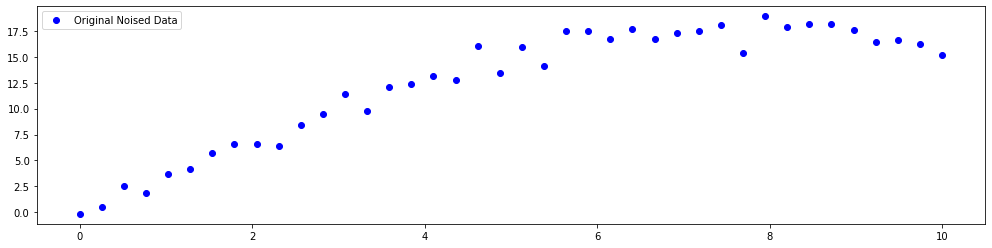

(40,)

In [13]:
x = np.linspace(0, 10, num = 40)
y = 17.45 * np.sin(0.2 * x) + np.random.normal(size = 40)  
    
y = (0.01 * (0.5-np.random.rand(40)))+y  #<<<< distorting element


plt.figure()
plt.figure(figsize=(17,4))
plt.plot(x, y, 'ko', color ='blue', label="Original Noised Data")
plt.legend()
plt.show()

x.shape

Adds a dimension to the x vector.

In [14]:
df = pd.DataFrame(x)
x = np.asarray(df)
x.shape

(40, 1)

### Model SVM non-linear kernels
 <span style="color:blue">SVR(kernel='rbf')</span>

In [15]:
svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)

# Fit the SVM model according to the given training data.
y_pred = svr_rbf.fit(x, y).predict(x)

In [16]:
import pandas as pd

RBF = pd.DataFrame({'y_actual': y, 'y_predicted': y_pred})
RBF.head(5)

,y_actual,y_predicted
0,-0.162622,-0.150990
1,0.529202,0.629017
2,2.555832,1.486978
3,1.900103,2.391904
4,3.695815,3.316034


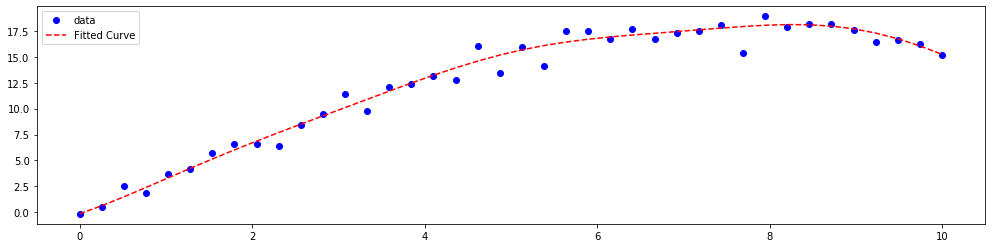

Mean Squared Error:    0.98  


In [17]:
plt.figure(figsize=(17,4))
plt.plot(x, y, 'o', color ='blue', label ="data") 
plt.plot(x, y_pred, '--', color ='red', label ="Fitted Curve") 
plt.legend() 
plt.show()

a = svr_rbf.score(x , y , sample_weight = None)
print('Mean Squared Error:    %0.2f  ' % a)

## <span style="color:blue">model summary</span>

In [18]:
y_pred=svr_rbf.predict(x)
a = svr_rbf.score(x , y , sample_weight = None)
print('Return the coefficient of determination R^2 of the prediction.')
print('Mean Squared Error:    %0.2f  ' % a)
print('Get parameters for this estimator.')
svr_rbf.get_params(deep=True)

Return the coefficient of determination R^2 of the prediction.
Mean Squared Error:    0.98  
Get parameters for this estimator.


{'C': 100,
 'cache_size': 200,
 'coef0': 0.0,
 'degree': 3,
 'epsilon': 0.1,
 'gamma': 0.1,
 'kernel': 'rbf',
 'max_iter': -1,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

## Example 3 non-linear kernels SVM  <span style="color:blue">SVR(kernel='rbf')</span>

<Figure size 432x288 with 0 Axes>

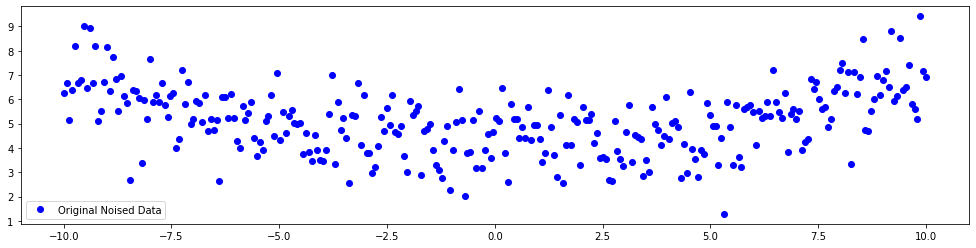

In [19]:
x = np.linspace(-10, 10, num = 300) 
y = 1.75 * np.cosh(0.168 * x) + np.random.normal(size = 300)   
    

y = (1.21 * (2.5-np.random.rand(300)))+y  #<<<< distorting element


plt.figure()
plt.figure(figsize=(17,4))
plt.plot(x, y, 'ko', color ='blue', label="Original Noised Data")
plt.legend()
plt.show()



Adds a dimension to the x vector.

In [20]:
print(x.shape)
df = pd.DataFrame(x)
x = np.asarray(df)
print(x.shape)

(300,)
(300, 1)


### Model SVM non-linear kernels
 <span style="color:blue">SVR(kernel='rbf')</span>

In [21]:
svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)

# Fit the SVM model according to the given training data.
y_pred = svr_rbf.fit(x, y).predict(x)

In [22]:
import pandas as pd

RBF = pd.DataFrame({'y_actual': y, 'y_predicted': y_pred})
RBF.head(5)

,y_actual,y_predicted
0,6.258306,6.525779
1,6.667066,6.567551
2,5.149480,6.603958
3,6.401777,6.634948
4,8.207138,6.660507


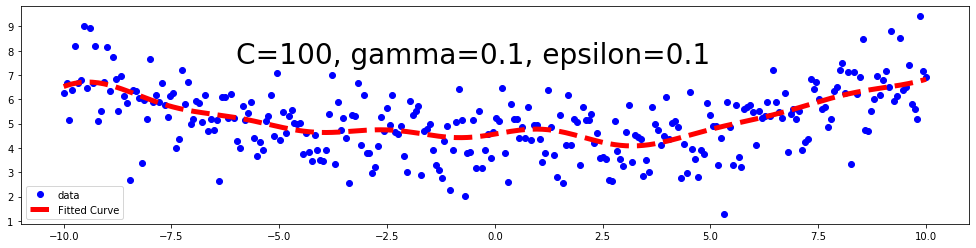

Mean Squared Error:    0.39  


In [23]:
plt.figure(figsize=(17,4))
plt.plot(x, y, 'o', color ='blue', label ="data") 
plt.plot(x, y_pred, '--', color ='red', linewidth=5, label ="Fitted Curve")
plt.text(-6, 7.5, r'C=100, gamma=0.1, epsilon=0.1', fontsize=28)
plt.legend() 
plt.show()

a = svr_rbf.score(x , y , sample_weight = None)
print('Mean Squared Error:    %0.2f  ' % a)

In [24]:
y_pred=svr_rbf.predict(x)
a = svr_rbf.score(x , y , sample_weight = None)
print('Return the coefficient of determination R^2 of the prediction.')
print('Mean Squared Error:    %0.2f  ' % a)
print('Get parameters for this estimator.')
svr_rbf.get_params(deep=True)

Return the coefficient of determination R^2 of the prediction.
Mean Squared Error:    0.39  
Get parameters for this estimator.


{'C': 100,
 'cache_size': 200,
 'coef0': 0.0,
 'degree': 3,
 'epsilon': 0.1,
 'gamma': 0.1,
 'kernel': 'rbf',
 'max_iter': -1,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

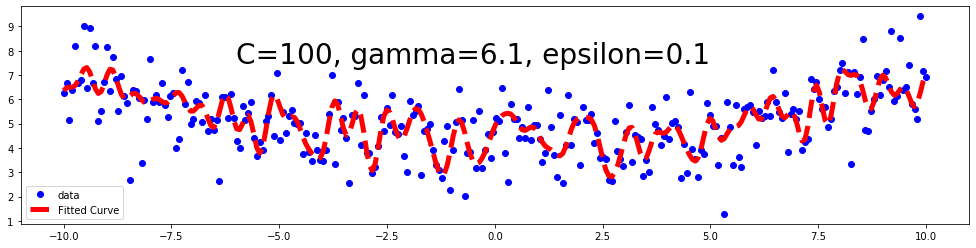

Mean Squared Error:    0.51  


In [25]:
svr_rbf = SVR(kernel='rbf', C=100, gamma=6.1, epsilon=.1)
# Fit the SVM model according to the given training data
y_pred = svr_rbf.fit(x, y).predict(x)

plt.figure(figsize=(17,4))
plt.plot(x, y, 'o', color ='blue', label ="data") 
plt.plot(x, y_pred, '--', color ='red', linewidth=5, label ="Fitted Curve") 
plt.text(-6, 7.5, r'C=100, gamma=6.1, epsilon=0.1', fontsize=28)
plt.legend() 
plt.show()

a = svr_rbf.score(x , y , sample_weight = None)
print('Mean Squared Error:    %0.2f  ' % a)

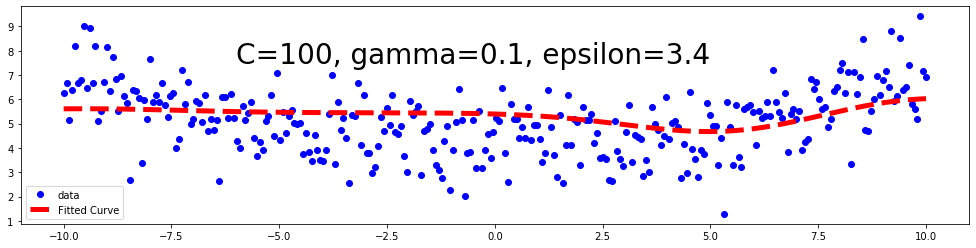

Mean Squared Error:    0.11  


In [26]:
svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=3.4)
# Fit the SVM model according to the given training data
y_pred = svr_rbf.fit(x, y).predict(x)

plt.figure(figsize=(17,4))
plt.plot(x, y, 'o', color ='blue', label ="data") 
plt.plot(x, y_pred, '--', color ='red', linewidth=5,label ="Fitted Curve") 
plt.text(-6, 7.5, r'C=100, gamma=0.1, epsilon=3.4', fontsize=28)
plt.legend() 
plt.show()

a = svr_rbf.score(x , y , sample_weight = None)
print('Mean Squared Error:    %0.2f  ' % a)

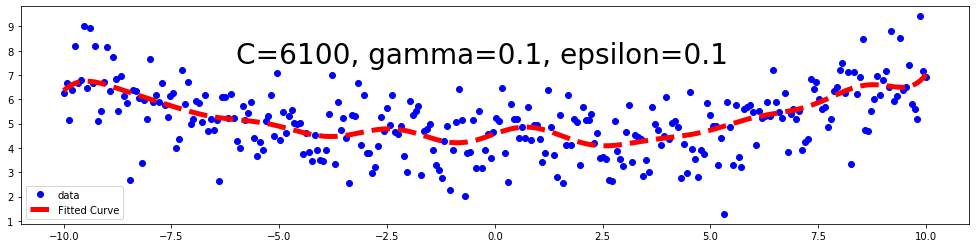

Mean Squared Error:    0.40  


In [27]:
svr_rbf = SVR(kernel='rbf', C=6100, gamma=0.1, epsilon=0.1)
# Fit the SVM model according to the given training data
y_pred = svr_rbf.fit(x, y).predict(x)

plt.figure(figsize=(17,4))
plt.plot(x, y, 'o', color ='blue', label ="data") 
plt.plot(x, y_pred, '--', color ='red', linewidth=5, label ="Fitted Curve") 
plt.text(-6, 7.5, r'C=6100, gamma=0.1, epsilon=0.1', fontsize=28)
plt.legend() 
plt.show()

a = svr_rbf.score(x , y , sample_weight = None)
print('Mean Squared Error:    %0.2f  ' % a)

### Użycie innego rodzaju jądra

In [28]:
svr_lin = SVR(kernel='linear', C=100, gamma='auto')
svr_poly = SVR(kernel='poly', C=100, gamma='auto', degree=3, epsilon=.1,
               coef0=1)

<Figure size 432x288 with 0 Axes>

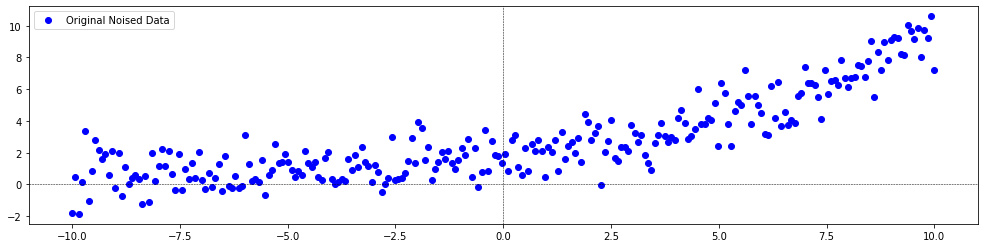

In [29]:
x = np.linspace(-10, 10, num = 260) 
y = 1.75 * np.exp(0.17 * x) + np.random.normal(size = 260)   

plt.figure()
plt.figure(figsize=(17,4))
plt.plot(x, y, 'ko', color ='blue', label="Original Noised Data")
plt.legend()
plt.axhline(y=0, color='black', linestyle='--', lw=0.5)
plt.axvline(x= 0, color = 'black', linestyle='--', lw=0.5)
plt.show() 

In [30]:
print(x.shape)
df = pd.DataFrame(x)
x = np.asarray(df)
print(x.shape)

(260,)
(260, 1)


In [33]:
svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=3.4)
svr_linear = SVR(kernel='linear', C=100, gamma='auto')
svr_poly = SVR(kernel='poly', C=100, gamma='auto', degree=3, epsilon=.1,
               coef0=1)
# Fit the SVM model according to the given training data
y_pred_rbf = svr_rbf.fit(x, y).predict(x)
y_pred_linear= svr_linear.fit(x, y).predict(x)
y_pred_poly = svr_poly.fit(x, y).predict(x)

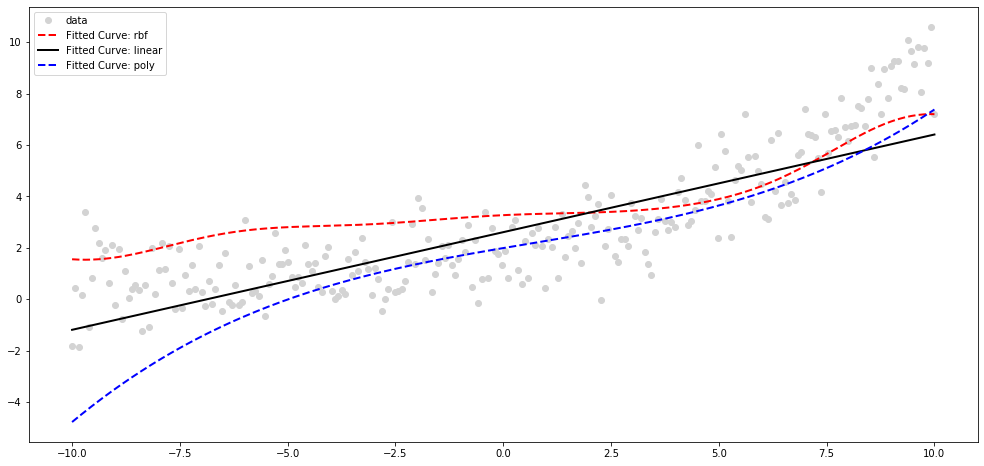

Mean Squared Error rbf:        0.60  
Mean Squared Error svr_linear: 0.69  
Mean Squared Error svr_poly:   0.40  


In [42]:
plt.figure(figsize=(17,8))
plt.plot(x, y, 'o', color ='lightgrey', label ="data") 
plt.plot(x, y_pred_rbf, '--', color ='red', linewidth=2,label ="Fitted Curve: rbf") 
plt.plot(x, y_pred_linear,  color ='black', linewidth=2,label ="Fitted Curve: linear") 
plt.plot(x, y_pred_poly, '--', color ='blue', linewidth=2,label ="Fitted Curve: poly") 
#plt.text(-6, 7.5, r'C=100, gamma=0.1, epsilon=3.4', fontsize=28)
plt.legend() 
plt.show()

rbf = svr_rbf.score(x , y , sample_weight = None)
print('Mean Squared Error rbf:        %0.2f  ' % rbf)

linear = svr_linear.score(x , y , sample_weight = None)
print('Mean Squared Error svr_linear: %0.2f  ' % linear)

poly = svr_poly.score(x , y , sample_weight = None)
print('Mean Squared Error svr_poly:   %0.2f  ' % a)